In [2]:
!pip install imblearn
!pip install lazypredict

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from IPython.display import display
import matplotlib.pyplot as plt 

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [7]:
# Visualize the proportion of borrowers
load_data = pd.read_csv("data\synthetic_conformity_data.csv")

load_data["conformity_class"] = np.where(
    load_data["conformity_class"] == "conforming", 1, 0
)

In [8]:
attributes = list(load_data.drop("conformity_class", axis=1).columns)
# scatter_matrix(load_data[attributes], figsize=(10, 8))

In [6]:
# load_data[attributes]

In [10]:
# Visualize the proportion of borrowers
load_data = pd.read_csv("data\synthetic_conformity_data.csv")

load_data["conformity_class"] = np.where(
    load_data["conformity_class"] == "conforming", 1, 0
)

# dummie_data = pd.get_dummies(load_data)


# X = dummie_data.drop("conformity_class", axis=1)
# y = dummie_data["conformity_class"]

In [11]:
# NORMALIZANDO OS DADOS 

df_max_scaled = load_data.copy() 
for column in df_max_scaled.columns: 
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max() 
    
df_min_max_scaled = load_data.copy() 
for column in df_min_max_scaled.columns: 
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())     
# print(df_min_max_scaled)

<Axes: >

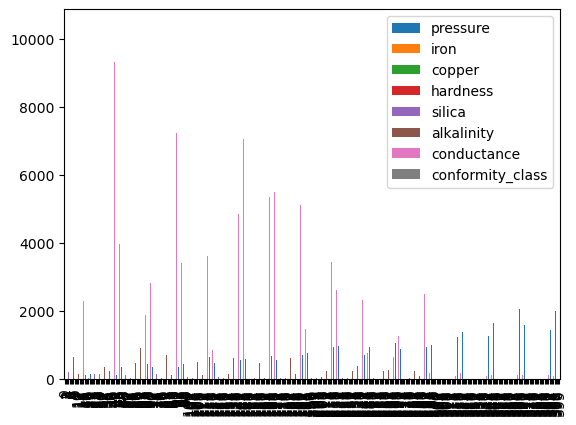

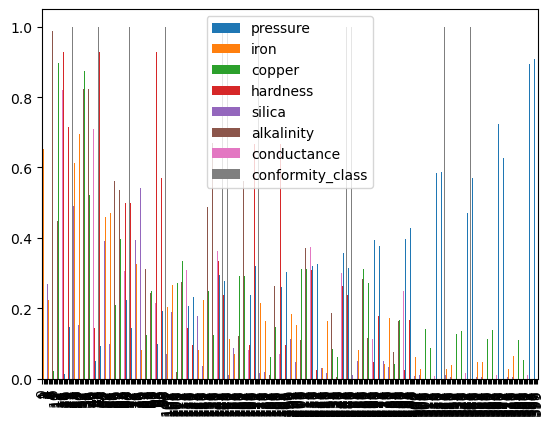

In [12]:
# sem normalização
load_data.plot(kind = 'bar')

df_min_max_scaled.plot(kind = 'bar')

In [13]:
# train_data = df_min_max_scaled
train_data = load_data

X = train_data.drop("conformity_class", axis=1)
y = train_data["conformity_class"]

# # SMOTE
smote = SMOTE(random_state=32)
X_smote_res, y_smote_res = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(
    X_smote_res, y_smote_res, test_size=0.30, random_state=999
)

In [88]:
# Classifier
clf = LazyClassifier(verbose=0, ignore_warnings=True)
clf_models, clf_predictions = clf.fit(X_train, X_test, y_train, y_test)

clf_models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.45it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.93,0.93,0.93,0.93,0.14
AdaBoostClassifier,0.88,0.88,0.88,0.88,0.12
RandomForestClassifier,0.88,0.88,0.88,0.88,0.21
XGBClassifier,0.88,0.88,0.88,0.88,0.09
LGBMClassifier,0.86,0.86,0.86,0.86,0.10
LabelPropagation,0.86,0.86,0.86,0.86,0.02
LabelSpreading,0.86,0.86,0.86,0.86,0.02
SVC,0.85,0.85,0.85,0.85,0.03
BaggingClassifier,0.85,0.85,0.85,0.85,0.04


In [46]:
# Regressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
reg_models, reg_predictions = reg.fit(X_train, X_test, y_train, y_test)

reg_models

 24%|███████████████████▌                                                              | 10/42 [00:00<00:01, 23.54it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:03<00:00, 11.35it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.80,0.80,0.22,0.14
HistGradientBoostingRegressor,0.69,0.70,0.27,0.66
RandomForestRegressor,0.67,0.68,0.28,0.23
LGBMRegressor,0.66,0.67,0.29,0.09
XGBRegressor,0.66,0.67,0.29,0.11
BaggingRegressor,0.60,0.61,0.31,0.03
GradientBoostingRegressor,0.60,0.61,0.31,0.10
NuSVR,0.55,0.57,0.33,0.04
SVR,0.54,0.56,0.33,0.03


In [86]:
# make a single prediction
columns = list(df_min_max_scaled.columns)

def test_model(row):
    new_row = []
    for i in range(0, len(row)): 
        column = columns[i]
        new_value = (row[i] - load_data[column].min()) / (load_data[column].max() - load_data[column].min())   
       
        # print(f"value={row[i]}, column={column}")
        # print(f"new_value={new_value}")
        
        new_row.append(new_value)
        
    yhat = model.predict([new_row])
    print('Predicted Class: %d' % yhat[0])
        
test_model([580, 0.005, 0.0002, 0.002, 150, 700, 100])        

Predicted Class: 0


In [92]:
# make a single prediction
row = [[300, 0.1, 0.05, 0.3, 150, 700, 5000]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


In [99]:
# row = [[403.52, 0.03, 0.01, 0.24, 83.07, 458.51, 6000]]
row = [[451.52, 0.03, 0.01, 0.2, 38.07, 458.51, 4000]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


>10 0.926 (0.031)
>50 0.945 (0.030)
>100 0.953 (0.024)
>500 0.949 (0.025)
>1000 0.949 (0.027)
>5000 0.951 (0.026)


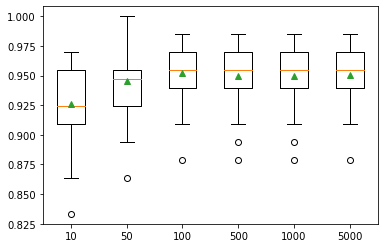

In [54]:
# explore extra trees number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
 X, y = X_smote_res, y_smote_res
 return X, y
 
# get a list of models to evaluate
def get_models():
 models = dict()
 # define number of trees to consider
 n_trees = [10, 50, 100, 500, 1000, 5000]
 for n in n_trees:
     models[str(n)] = ExtraTreesClassifier(n_estimators=n)
 return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
 # define the evaluation procedure
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 # evaluate the model and collect the results
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 # evaluate the model
 scores = evaluate_model(model, X, y)
 # store the results
 results.append(scores)
 names.append(name)
 # summarize the performance along the way
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()